In [14]:
%matplotlib widget

import matplotlib.pyplot as plt
from skimage import io
from skimage.transform import resize
from skimage.transform import warp, ProjectiveTransform
from stereo_utils import *
from skimage.color import rgb2gray, rgba2rgb

## Plot Images and Matching Points

In [15]:
# load images
im1 = io.imread("data/bench/right.png")
im1 = rgb2gray(rgba2rgb(im1))
im2 = io.imread("data/bench/left.png")
im2 = rgb2gray(rgba2rgb(im2))

# load matching points
points1 = np.load("data/bench/right_points.npy")
points2 = np.load("data/bench/left_points.npy")

assert (points1.shape == points2.shape)

##### Plot matching points

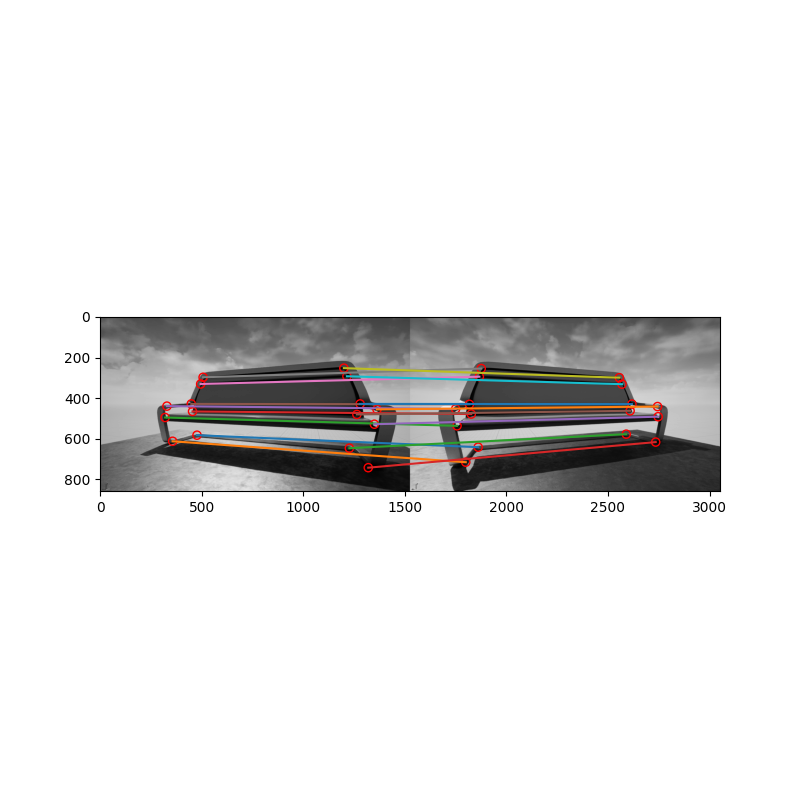

In [16]:
show_matching_result(im1, im2, points1, points2)

## The Fundamental Matrix

In [17]:
# compute the normalized fundamental matrix 
F = compute_fundamental_matrix_normalized(points1, points2)

In [18]:
# validate the fundamental matrix equation
p1 = points1.T[:, 0]
p2 = points2.T[:, 0]

np.round(p2.T @ F @ p1)

0.0

### Plot Epipolar lines

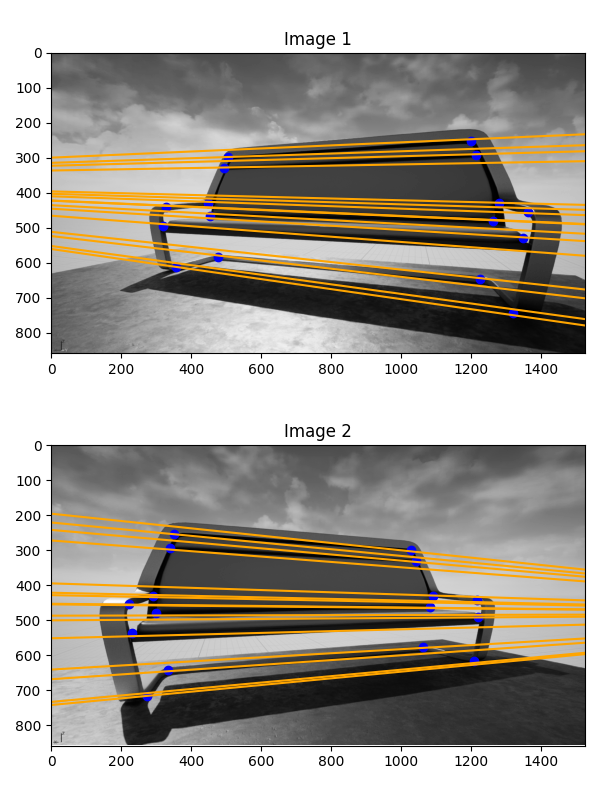

In [19]:
plot_epipolar_lines(im1, im2, points1, points2, show_epipole=False)

### Plot Epipoles

In [20]:
e1 = compute_epipole(F)
e2 = compute_epipole(F.T)

In [21]:
# validate fundamental matrix equation for epipoles
np.round(e2.T @ F @ e1)

-0.0

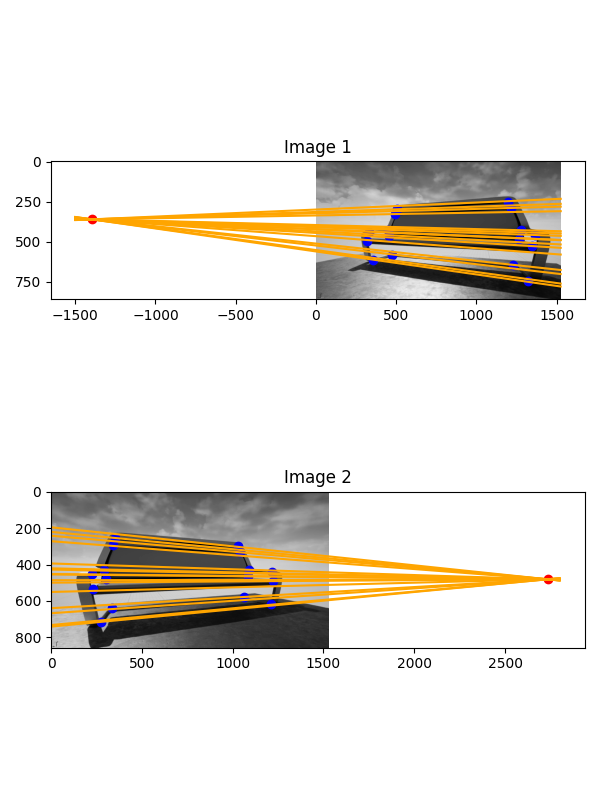

In [22]:
plot_epipolar_lines(im1, im2, points1, points2, show_epipole=True)

## Stereo rectification

In [23]:
H1, H2 = compute_matching_homographies(e2, F, im2, points1, points2)

In [24]:
# Transform points based on the homography matrix
new_points1 = H1 @ points1.T
new_points2 = H2 @ points2.T
new_points1 /= new_points1[2,:]
new_points2 /= new_points2[2,:]
new_points1 = new_points1.T
new_points2 = new_points2.T

# warp images based on the homography matrix
im1_warped = warp(im1, ProjectiveTransform(matrix=np.linalg.inv(H1)))
im2_warped = warp(im2, ProjectiveTransform(matrix=np.linalg.inv(H2)))

##### Plot the new epipolar lines and matching points

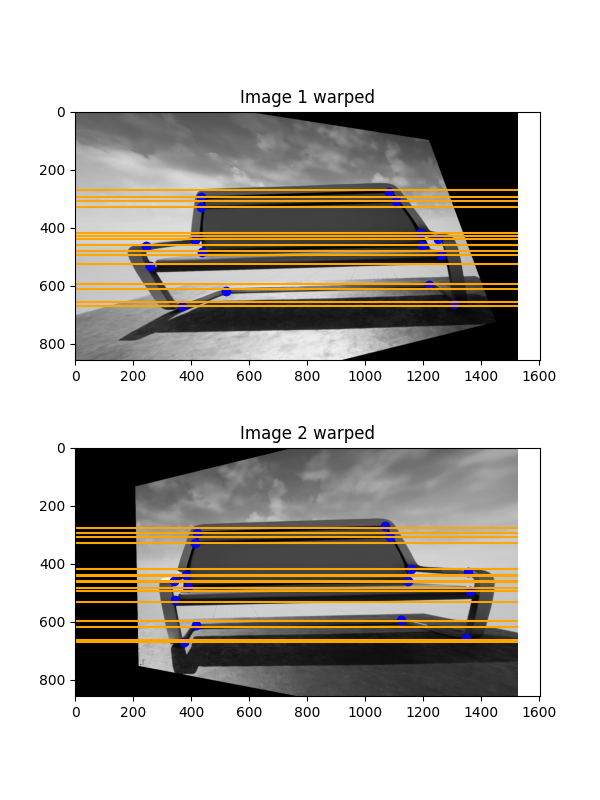

In [25]:
h, w = im1.shape

nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6, 8))

# plot image 1
ax1 = axes[0]
ax1.set_title("Image 1 warped")
ax1.imshow(im1_warped, cmap="gray")

# plot image 2
ax2 = axes[1]
ax2.set_title("Image 2 warped")
ax2.imshow(im2_warped, cmap="gray")

# plot the epipolar lines and points
n = new_points1.shape[0]
for i in range(n):
    p1 = new_points1[i]
    p2 = new_points2[i]

    ax1.hlines(p2[1], 0, w, color="orange")
    ax1.scatter(*p1[:2], color="blue")

    ax2.hlines(p1[1], 0, w, color="orange")
    ax2.scatter(*p2[:2], color="blue")

### Empirical observation

##### Epipolar lines and the fundamental matrix computed for images whose image planes are almost parallel are not accurate

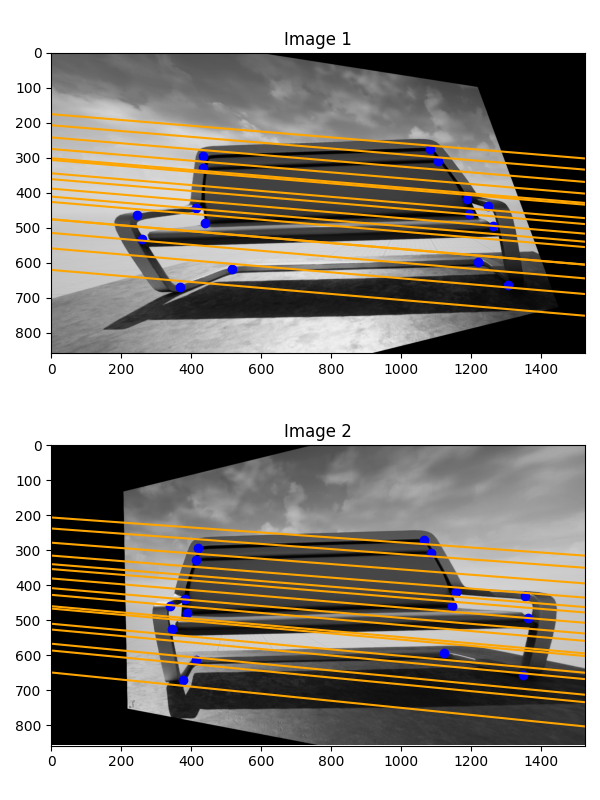

In [26]:
plot_epipolar_lines(im1_warped, im2_warped, new_points1, new_points2, show_epipole=False)

We can see the epipolar lines are not accurate